# Prepare SpaceNet 7 Data for Model Training



In [ ]:
import pandas as pd
import torch as t
import torch.nn as nn
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi
#Check cuda version
is_cuda_available=t.cuda.is_available()
print(is_cuda_available)
# Generalize cuda for all comands without writing .cuda()
device = t.device('cuda:0') 
t.cuda.set_device(device)

Tue Apr 13 16:35:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pwd

/content


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline

/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline


In [1]:
# RUN ONLY ONCE
# Download desired version for GDAL
!wget http://download.osgeo.org/gdal/3.0.4/gdal-3.0.4.tar.gz
!tar zxvf gdal-3.0.4.tar.gz
# RUN ONLY ONCE
# First install GDAL version above 3.0.0, since lower versions are not compatible with Solaris and creates error "gdal wheel". Therefore, first add desired version and then update command (generelize), otherwise it will install smaller versions
# If the commands below doesn't work, test wit:
# !pip install --global-option=build_ext --global-option="-I/usr/include/gdal" GDAL==`gdal-config --version`
# Otherwise:
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable

!apt-get install gdal-bin

!apt-get install python3-gdal

!apt-get install python3-numpy

# RUN ONLY ONCE
# Missing dependencies - check here version is above 3.0, otherwise won't work
!pip install --global-option=build_ext --global-option="-I/usr/include/gdal" GDAL==`gdal-config --version`
!gdalinfo --version

# test gdal
import gdal

--2021-04-19 19:58:05--  http://download.osgeo.org/gdal/3.0.4/gdal-3.0.4.tar.gz
Resolving download.osgeo.org (download.osgeo.org)... 140.211.15.30
Connecting to download.osgeo.org (download.osgeo.org)|140.211.15.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14379480 (14M) [application/octet-stream]
Saving to: ‘gdal-3.0.4.tar.gz’

gdal-3.0.4.tar.gz   100%[===================>]  13.71M  3.23MB/s    in 4.3s    

2021-04-19 19:58:09 (3.21 MB/s) - ‘gdal-3.0.4.tar.gz’ saved [14379480/14379480]

gdal-3.0.4/
gdal-3.0.4/ogr/
gdal-3.0.4/ogr/style_pen1.gif
gdal-3.0.4/ogr/ogrpgeogeometry.h
gdal-3.0.4/ogr/ogrcompoundcurve.cpp
gdal-3.0.4/ogr/ogr_xerces.cpp
gdal-3.0.4/ogr/ogrfeaturestyle.cpp
gdal-3.0.4/ogr/ogrcurvepolygon.cpp
gdal-3.0.4/ogr/ogr_api.h
gdal-3.0.4/ogr/ogr_api.cpp
gdal-3.0.4/ogr/ogr_drivertut.dox
gdal-3.0.4/ogr/wktproblems.html
gdal-3.0.4/ogr/swq_parser.cpp
gdal-3.0.4/ogr/ogr_xerces.h
gdal-3.0.4/ogr/swq_parser.hpp
gdal-3.0.4/ogr/ogr_geos.h
gdal-3.0.4/ogr/ogr

In [5]:
# RUN ONLY ONCE
#!pip install GDAL - RUN ONLY ONCE
#!gdal-config --version
!pip install geopandas

import geopandas as gpd

# Test geojson
!geos-config --version
!whereis geos-config
!make distclean

!pip install git+git://github.com/geopandas/geopandas.git

     |████████████████████████████████| 1.0MB 26.6MB/s 
3.8.0
geos-config: /usr/bin/geos-config /usr/share/man/man1/geos-config.1.gz
make: *** No rule to make target 'distclean'.  Stop.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-dv4iixxe
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-dv4iixxe
  Created wheel for geopandas: filename=geopandas-0.9.0+13.gf4a9763-py2.py3-none-any.whl size=995262 sha256=e6605bc0e5190c647f5a45083dc5cd804fcd82407350218c163b95b53c69d4c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-3izuq8u1/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
  Found existing installation: geopandas 0.9.0
    Uninstalling geopandas-0.9.0:
      Successfully uninstalled geopandas-0.9.0


In [6]:
# RUN TWICE ONCE (with warmings) and restart runtime, then re-run this cell again
!pip install solaris

In [4]:
import solaris as sol
print(sol.__version__)
!gdalinfo --version

ModuleNotFoundError: ignored

### load other libraries

In [ ]:
% cd /content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline

/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline


In [ ]:
import multiprocessing
import pandas as pd
import numpy as np
import skimage
import gdal
import sys
import os

import matplotlib as mpl
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams.update({'font.size': 16})
mpl.rcParams['figure.dpi'] = 300

import solaris as sol
from solaris.raster.image import create_multiband_geotiff
from solaris.utils.core import _check_gdf_load

# import from data_prep_funcs
module_path = os.path.abspath(os.path.join('/content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src/'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [ ]:
% cd /content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src/

/content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src


In [ ]:
from sn7_baseline_prep_funcs import map_wrapper, make_geojsons_and_masks

In [ ]:
# Dataset location (edit as needed)
root_dir = '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train'

--------
### Create training Masks

In [ ]:
# Create Training Masks
# Multi-thread to increase speed
# We'll only make a 1-channel mask for now, but Solaris supports a multi-channel mask as well, see
#     https://github.com/CosmiQ/solaris/blob/master/docs/tutorials/notebooks/api_masks_tutorial.ipynb
aois = sorted([f for f in os.listdir(os.path.join(root_dir, 'train'))
               if os.path.isdir(os.path.join(root_dir, 'train', f))])

print(aois)
print("Printing over 1 channel")
n_threads = 10
params = [] 
make_fbc = False

input_args = []

['L15-0331E-1257N_1327_3160_13', 'L15-0357E-1223N_1429_3296_13', 'L15-0358E-1220N_1433_3310_13', 'L15-0361E-1300N_1446_2989_13', 'L15-0368E-1245N_1474_3210_13', 'L15-0387E-1276N_1549_3087_13', 'L15-0434E-1218N_1736_3318_13', 'L15-0457E-1135N_1831_3648_13', 'L15-0487E-1246N_1950_3207_13', 'L15-0506E-1204N_2027_3374_13', 'L15-0544E-1228N_2176_3279_13', 'L15-0566E-1185N_2265_3451_13', 'L15-0571E-1075N_2287_3888_13', 'L15-0577E-1243N_2309_3217_13', 'L15-0586E-1127N_2345_3680_13', 'L15-0595E-1278N_2383_3079_13', 'L15-0614E-0946N_2459_4406_13', 'L15-0632E-0892N_2528_4620_13', 'L15-0683E-1006N_2732_4164_13', 'L15-0760E-0887N_3041_4643_13', 'L15-0924E-1108N_3699_3757_13', 'L15-0977E-1187N_3911_3441_13', 'L15-1014E-1375N_4056_2688_13', 'L15-1015E-1062N_4061_3941_13', 'L15-1025E-1366N_4102_2726_13', 'L15-1049E-1370N_4196_2710_13', 'L15-1138E-1216N_4553_3325_13', 'L15-1172E-1306N_4688_2967_13', 'L15-1185E-0935N_4742_4450_13', 'L15-1200E-0847N_4802_4803_13', 'L15-1203E-1203N_4815_3378_13', 'L15-12

In [ ]:
for i, aoi in enumerate(aois):
    print(i, "aoi:", aoi)
    im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked/')
    json_dir = os.path.join(root_dir, 'train', aoi, 'labels_match/')
    out_dir_mask = os.path.join(root_dir, 'train', aoi, 'masks/')
    out_dir_mask_fbc = os.path.join(root_dir, 'train', aoi, 'masks_fbc/')
    os.makedirs(out_dir_mask, exist_ok=True)
    if make_fbc:
        os.makedirs(out_dir_mask_fbc, exist_ok=True)

    json_files = sorted([f
                for f in os.listdir(os.path.join(json_dir))
                if f.endswith('Buildings.geojson') and os.path.exists(os.path.join(json_dir, f))])
    for j, f in enumerate(json_files):
        # print(i, j, f)
        name_root = f.split('.')[0]
        json_path = os.path.join(json_dir, f)
        image_path = os.path.join(im_dir, name_root + '.tif').replace('labels', 'images').replace('_Buildings', '')
        output_path_mask = os.path.join(out_dir_mask, name_root + '.tif')
        if make_fbc:
            output_path_mask_fbc = os.path.join(out_dir_mask_fbc, name_root + '.tif')
        else:
            output_path_mask_fbc = None
            
        if (os.path.exists(output_path_mask)):
             continue
        else: 
            input_args.append([make_geojsons_and_masks, 
                               name_root, image_path, json_path,
                               output_path_mask, output_path_mask_fbc])

# execute 
print("len input_args", len(input_args))
print("Execute...\n")
print("hecho!")
#with multiprocessing.Pool(n_threads) as pool:
#    pool.map(map_wrapper, input_args)

0 aoi: L15-0331E-1257N_1327_3160_13
1 aoi: L15-0357E-1223N_1429_3296_13
2 aoi: L15-0358E-1220N_1433_3310_13
3 aoi: L15-0361E-1300N_1446_2989_13
4 aoi: L15-0368E-1245N_1474_3210_13
5 aoi: L15-0387E-1276N_1549_3087_13
6 aoi: L15-0434E-1218N_1736_3318_13
7 aoi: L15-0457E-1135N_1831_3648_13
8 aoi: L15-0487E-1246N_1950_3207_13
9 aoi: L15-0506E-1204N_2027_3374_13
10 aoi: L15-0544E-1228N_2176_3279_13
11 aoi: L15-0566E-1185N_2265_3451_13
12 aoi: L15-0571E-1075N_2287_3888_13
13 aoi: L15-0577E-1243N_2309_3217_13
14 aoi: L15-0586E-1127N_2345_3680_13
15 aoi: L15-0595E-1278N_2383_3079_13
16 aoi: L15-0614E-0946N_2459_4406_13
17 aoi: L15-0632E-0892N_2528_4620_13
18 aoi: L15-0683E-1006N_2732_4164_13
19 aoi: L15-0760E-0887N_3041_4643_13
20 aoi: L15-0924E-1108N_3699_3757_13
21 aoi: L15-0977E-1187N_3911_3441_13
22 aoi: L15-1014E-1375N_4056_2688_13
23 aoi: L15-1015E-1062N_4061_3941_13
24 aoi: L15-1025E-1366N_4102_2726_13
25 aoi: L15-1049E-1370N_4196_2710_13
26 aoi: L15-1138E-1216N_4553_3325_13
27 aoi: L15

### Extraction of identifiers (visualization purposes)

Only use one image, but from here we can see that the whole tile is plotted, not the chunks. So the difference with *tiling an image* is that on this we get a whole tile and split it into smaller chunks. On this case, we have downloaded already the training sets, so we just need to read them and make sure that images and labels match.

In [ ]:
# make identifier plots

aoi = 'L15-0358E-1220N_1433_3310_13'
im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked')
json_dir = os.path.join(root_dir, 'train', aoi, 'labels_match/')

# colors
vmax = 200
cmap = plt.get_cmap('hsv')  # 'jet'
cNorm  = colors.Normalize(vmin=0, vmax=vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plot_only_first_and_last = True
label_font_size = 4
im_pix_size_x, im_pix_size_y = 1024, 1024
figsize=(20,20)

json_files = sorted([f
            for f in os.listdir(json_dir)
            if f.endswith('Buildings.geojson') and os.path.exists(os.path.join(json_dir, f))])
if plot_only_first_and_last:
    json_files = [json_files[0], json_files[-1]]

# convert json
for j, f in enumerate(json_files):
    # print(i, j, f)
    name_root = f.split('.')[0]
    json_path = os.path.join(json_dir, f)
    image_path = os.path.join(im_dir, name_root + '.tif').replace('_Buildings', '')
    print("name_root:", name_root)
    # print("json_path", json_path)
    # output_path = os.path.join(out_dir, f)
    # if os.path.exists(output_path):
    #    print("  path exists, skipping:", name_root)
    #    continue
    gdf_pix = sol.vector.polygon.geojson_to_px_gdf(json_path, image_path, geom_col='geometry', precision=None,
                  output_path=None, override_crs=False)
    fig, ax = plt.subplots(figsize=figsize)
    for _, row in gdf_pix.iterrows():
        geom = row['geometry']
        poly_id = row['Id']
        x, y = geom.exterior.xy
        cx, cy = np.array(geom.centroid.xy).astype(float)
        #print("centroid:", centroid)
        color_int = int(poly_id) % vmax
        colorVal = scalarMap.to_rgba(color_int)
        ax.plot(x, y, c=colorVal)
        # poly id
        ax.annotate(str(poly_id), xy=(cx, cy), ha='center', size=label_font_size)
        #text_object = plt.annotate(label, xy=(x_values[i], y_values[i]), ha='center')
        #ax.text(cx, cy, str(poly_id))
    ax.set_xlim(0, im_pix_size_x)
    ax.set_ylim(0, im_pix_size_y)
    title = str(j) + " - " + name_root + " - N buildings = " + str(len(gdf_pix))
    ax.set_title(title)
    print("Adding")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Inspect visually

im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked')
mask_dir = os.path.join(root_dir, 'train', aoi, 'masks')

im_list = sorted([z for z in os.listdir(im_dir) if z.endswith('.tif')])
im_file = im_list[0]

im_path = os.path.join(im_dir, im_file)
print("im_path \n \n \n", im_path)
mask_path = os.path.join(mask_dir, im_file.split('.')[0] + '_Buildings.tif')
print("mask_path", mask_path)
im = skimage.io.imread(im_path)
mask = skimage.io.imread(mask_path)

figsize=(24, 12)
name = im_file.split('.')[0].split('global_monthly_')[-1]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)
_ = ax0.imshow(im)
ax0.set_xticks([])
ax0.set_yticks([])
# _ = ax0.set_title(name)
_ = ax1.imshow(mask)
ax1.set_xticks([])
ax1.set_yticks([])
# _ = ax1.set_title(name)
_ = fig.suptitle(name)
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

## Make dataframe csvs for train/testing

This is what we will use to feed the model

We will concatenate the training image (images masked): 

/home/sebasmos/Documentos/TRDP/DATASET/SN7_buildings_train/train/L15-0331E-1257N_1327_3160_13/**images_masked**/global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13.tif

with its correspondent labeling (mask)

/home/sebasmos/Documentos/TRDP/DATASET/SN7_buildings_train/train/L15-0331E-1257N_1327_3160_13/**masks**/global_monthly_2018_02_mosaic_L15-0331E-1257N_1327_3160_13_Buildings.tif


In [ ]:

import os
out_dir = os.path.join(root_dir, 'csvs/')
print(out_dir)
pops = ['train', 'test_public']
os.makedirs(out_dir, exist_ok=True)

/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/


In [ ]:
for pop in pops: 
    d = os.path.join(root_dir, pop)
    print("d: ",d)
    outpath = os.path.join(out_dir, 'sn7_baseline_' + pop + '_df.csv')
    print("outpath: ",outpath)
    im_list, mask_list = [], []
    subdirs = sorted([f for f in os.listdir(d) if os.path.isdir(os.path.join(d, f))])
    for subdir in subdirs:        
        if pop == 'train':            
            im_files = [os.path.join(d, subdir, 'images_masked', f)
                    for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                    if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif'))]
            #print(im_files)
            mask_files = [os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif')
                      for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                      if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif'))]
            im_list.extend(im_files)
            mask_list.extend(mask_files)
    
      #  elif pop == 'test_public':
      #      im_files = [os.path.join(d, subdir, 'images_masked', f)
      #              for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
      #              if f.endswith('.tif')]
      #      im_list.extend(im_files)

    # save to dataframes
    print("im_list:", im_list)
    print("mask_list:", mask_list)
    if pop == 'train':
        df = pd.DataFrame({'image': im_list, 'label': mask_list})
        display(df.head())
    #elif pop == 'test_public':
    #    df = pd.DataFrame({'image': im_list})
    #df.to_csv(outpath, index=False)
    print(pop, "len df:", len(df))
    print("output csv:", outpath)
    print("working!!")

d:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train
outpath:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/sn7_baseline_train_df.csv
im_list: ['/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_03_mosaic_L15-0357E-1223N_1429_3296_13.tif', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_04_mosaic_L15-0357E-1223N_1429_3296_13.tif', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_05_mosaic_L15-0357E-1223N_1429_3296_13.tif', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_06_mosaic_L15-0357E-1223N_1429_3296_13.tif', '/content/drive/M

,image,label
0,/content/drive/MyDrive/Colab Notebooks/SPACENE...,/content/drive/MyDrive/Colab Notebooks/SPACENE...
1,/content/drive/MyDrive/Colab Notebooks/SPACENE...,/content/drive/MyDrive/Colab Notebooks/SPACENE...
2,/content/drive/MyDrive/Colab Notebooks/SPACENE...,/content/drive/MyDrive/Colab Notebooks/SPACENE...
3,/content/drive/MyDrive/Colab Notebooks/SPACENE...,/content/drive/MyDrive/Colab Notebooks/SPACENE...
4,/content/drive/MyDrive/Colab Notebooks/SPACENE...,/content/drive/MyDrive/Colab Notebooks/SPACENE...


train len df: 1232
output csv: /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/sn7_baseline_train_df.csv
working!!
d:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/test_public
outpath:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/sn7_baseline_test_public_df.csv
im_list: []
mask_list: []
test_public len df: 1232
output csv: /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/sn7_baseline_test_public_df.csv
working!!


In [ ]:
# TODO: change to conda
df.head(10)

,image,root
0,global_monthly_2017_07_mosaic_L15-1203E-1203N_...,L15-1203E-1203N_4815_3379_13
1,global_monthly_2017_07_mosaic_L15-1615E-1205N_...,L15-1615E-1205N_6461_3368_13
2,global_monthly_2017_07_mosaic_L15-1670E-1159N_...,L15-1670E-1159N_6681_3552_13
3,global_monthly_2017_07_mosaic_L15-1690E-1210N_...,L15-1690E-1210N_6762_3348_13
4,global_monthly_2017_08_mosaic_L15-1203E-1203N_...,L15-1203E-1203N_4815_3379_13
5,global_monthly_2017_08_mosaic_L15-1615E-1205N_...,L15-1615E-1205N_6461_3368_13
6,global_monthly_2017_08_mosaic_L15-1670E-1159N_...,L15-1670E-1159N_6681_3552_13
7,global_monthly_2017_08_mosaic_L15-1690E-1210N_...,L15-1690E-1210N_6762_3348_13
8,global_monthly_2017_09_mosaic_L15-1203E-1203N_...,L15-1203E-1203N_4815_3379_13
9,global_monthly_2017_09_mosaic_L15-1615E-1205N_...,L15-1615E-1205N_6461_3368_13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   404 non-null    object
 1   label   404 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


## Load model

In [ ]:
path_to_model = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/API/models"

model_name = '/xdxd_spacenet4.yml'

fullpath = "%s%s" % ( path_to_model, model_name ) # for Linux

print(fullpath)

# Update through online editor while hypertunning \ lower batch to 5
config = sol.utils.config.parse(fullpath)
config

**Remarks**
Collecting garbage and emptying cuda memory after each epoch to save up memory [See issue](https://github.com/pytorch/pytorch/issues/16417)

Other options:

1.  Decrease the batch size and increase the epochs

2.  If 'CUDA out of memory' error msg pops up even no iteration goes, then check the batch size you set and decrease it.

3.  If 'CUDA out of memory' error msg pops up after some iterations, then check all the variables in the computing graph, and detach the unnecessary variables. I usually run into this situation, e.g., I did not detach the inputs of my measure/loss functions ->  which are not involved in backward propagation.

A practical way to tell what's happening is using nvidia-smi command every few seconds to check whether the CUDA memory usage is increasing. If it is, I think you may run into the second situation.

In [ ]:

import gc 

# Your code with pytorch using GPU

gc.collect() 

t.cuda.empty_cache()

In [ ]:
trainer = sol.nets.train.Trainer(config)
trainer.train()

Beginning training epoch 0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


    loss at batch 0: 5.492740631103516
    loss at batch 10: 4.99847412109375
    loss at batch 20: 4.64002799987793
    loss at batch 30: 4.026910305023193
    loss at batch 40: 4.4081926345825195

    Validation loss at epoch 0: 4.6005120277404785

Beginning training epoch 1
    loss at batch 0: 4.651326656341553
    loss at batch 10: 5.078008651733398
    loss at batch 20: 3.663634777069092
    loss at batch 30: 4.3866119384765625
    loss at batch 40: 3.68233585357666

    Validation loss at epoch 1: 4.229275703430176

Beginning training epoch 2
    loss at batch 0: 4.620780944824219
    loss at batch 10: 4.514157772064209
    loss at batch 20: 4.214783668518066
    loss at batch 30: 4.835726737976074
    loss at batch 40: 4.274371147155762

    Validation loss at epoch 2: 4.1772027015686035

Beginning training epoch 3
    loss at batch 0: 4.717904567718506
    loss at batch 10: 3.751441717147827
    loss at batch 20: 3.5326943397521973
    loss at batch 30: 4.272472858428955
    l

 Models stored on /DATASETS/API/trained_models

# Running model: Inference — Segmentation Mask

Once training is completed (or pre-trained weights are selected) inference can be initiated via:

In [ ]:
% cd /content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src
!ls

/content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src
__init__.py  sn7_baseline_infer.py	     sn7_baseline_prep_funcs.py
__pycache__  sn7_baseline_postproc_funcs.py  sn7_baseline_train.py


The sn7_baseline_infer.py script executes the segmentation model, which is only the first step in the extracting matched building footprints in the data cube. In the cells below, we refine these predictioms masks to the final output.

In [ ]:
!pip install tifffile 
!pip install imagecodecs 
import numpy 
import tifffile as tiff 

     |████████████████████████████████| 24.7MB 130kB/s 


In [ ]:
!ls

__init__.py  sn7_baseline_infer.py	     sn7_baseline_prep_funcs.py
__pycache__  sn7_baseline_postproc_funcs.py  sn7_baseline_train.py


In [ ]:
!python sn7_baseline_infer.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

*Remarks about inference stage:*

sn7_baseline_infer.py is composed of a yaml file which contains the model parameters. The model can be pre-trained and addressed based on the given path (pre-trained, customized or not). Internally:

```
import solaris as sol

config = sol.utils.config.parse('/path/to/xdxd_spacenet4.yml')

config

trainer = sol.nets.train.Trainer(config)

trainer.train()

```

Check reference in [1](https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_training_spacenet.html)

For this particular case, the model will be stored in `inference_out/` folder, following a tree structure containing a `raw/` folder, which contains the predictions on the format `global_monthly_2018_04_mosaic_L15-0509E-1108N_2037_3758_13.geojson` which is afterward splited for extracting its aoi (i.e L15-0509E-1108N_2037_3758_13) and subsequently greating the subfolders: `grouped, explore` for visualization and id tracking assignment purposes



--------
## 3. Extract Footprints and Building Identifiers

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/src


In [ ]:
# Set prediction and image directories (edit appropriately)
pred_top_dir = '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds'
im_top_dir = '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train'
#im_top_dir = '/local_data/sn7/aws_download/test_public'

from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
import geopandas as gpd
import multiprocessing
import pandas as pd
import numpy as np
import skimage.io
import tqdm
import glob
import math
import gdal
import time
import sys
import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib
# matplotlib.use('Agg') # non-interactive

import solaris as sol
from solaris.utils.core import _check_gdf_load
from solaris.raster.image import create_multiband_geotiff 

# import from data_postproc_funcs
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sn7_baseline_postproc_funcs import map_wrapper, multithread_polys, \
        calculate_iou, track_footprint_identifiers, \
        sn7_convert_geojsons_to_csv

In [ ]:
raw_name = 'raw/'
grouped_name = 'grouped/'
im_list = sorted([z for z in os.listdir(os.path.join(pred_top_dir, raw_name)) if z.endswith('.tif')])
print("im_list: ",im_list)
 

im_list:  ['global_monthly_2017_07_mosaic_L15-1203E-1203N_4815_3379_13.tif', 'global_monthly_2017_07_mosaic_L15-1615E-1205N_6461_3368_13.tif', 'global_monthly_2017_07_mosaic_L15-1670E-1159N_6681_3552_13.tif', 'global_monthly_2017_07_mosaic_L15-1690E-1210N_6762_3348_13.tif', 'global_monthly_2017_08_mosaic_L15-1203E-1203N_4815_3379_13.tif', 'global_monthly_2017_08_mosaic_L15-1615E-1205N_6461_3368_13.tif', 'global_monthly_2017_08_mosaic_L15-1670E-1159N_6681_3552_13.tif', 'global_monthly_2017_08_mosaic_L15-1690E-1210N_6762_3348_13.tif', 'global_monthly_2017_09_mosaic_L15-1203E-1203N_4815_3379_13.tif', 'global_monthly_2017_09_mosaic_L15-1615E-1205N_6461_3368_13.tif', 'global_monthly_2017_09_mosaic_L15-1670E-1159N_6681_3552_13.tif', 'global_monthly_2017_10_mosaic_L15-1203E-1203N_4815_3379_13.tif', 'global_monthly_2017_10_mosaic_L15-1615E-1205N_6461_3368_13.tif', 'global_monthly_2017_10_mosaic_L15-1670E-1159N_6681_3552_13.tif', 'global_monthly_2017_10_mosaic_L15-1690E-1210N_6762_3348_13.tif',

In [ ]:
df = pd.DataFrame({'image': im_list})
roots = [z.split('mosaic_')[-1].split('.tif')[0] for z in df['image'].values]
print("roots: ", roots)
df['root'] = roots
# copy files
for idx, row in df.iterrows():
    in_path_tmp = os.path.join(pred_top_dir, raw_name, row['image'])
    out_dir_tmp = os.path.join(pred_top_dir, grouped_name, row['root'], 'masks') 
    os.makedirs(out_dir_tmp, exist_ok=True) # create masks directories
    cmd = 'cp ' + in_path_tmp + ' ' + out_dir_tmp
    print("cmd:", cmd)
    os.system(cmd) 

roots:  ['L15-1203E-1203N_4815_3379_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1690E-1210N_6762_3348_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1690E-1210N_6762_3348_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1690E-1210N_6762_3348_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1690E-1210N_6762_3348_13', 'L15-0357E-1223N_1429_3296_13', 'L15-0391E-1219N_1567_3314_13', 'L15-0697E-0874N_2789_4694_13', 'L15-0744E-0927N_2979_4481_13', 'L15-1031E-1300N_4127_2991_13', 'L15-1129E-0819N_4517_4915_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1249E-1167N_4999_3521_13', 'L15-1281E-1035N_5125_4049_13', 'L15-1438E-1227N_5753_3282_13', 'L15-1546E-1154N_6186_3574_13', 'L15-1615E-1205N_6461_3368_13',

This section will extract the raw image names, initially generated by the model, and will fill the grouped folder with an inner folder called masks. But at this stage, it will be empty.

### Explore predictions

** Folders creation (grouped and explore) from model inference (raw folder on inference out folder). 

Error happens when instantiating a sample image by its aoi, because there is a  relationship between the raw predicted .tif for creating a mask sub-folder, but not a function that copies or creates the masks onto the mask sub-folder. 

In [ ]:

#aoi = 'L15-0509E-1108N_2037_3758_13'
aoi = 'L15-0357E-1223N_1429_3296_13'
# create temporal explore folder on sn7_baseline_preds path
out_dir_explore = os.path.join(pred_top_dir, 'explore', aoi)
print("pred_top_dir: ",pred_top_dir)
os.makedirs(out_dir_explore, exist_ok=True)
# Create mask subfolder  inside the grouped + aoi folder
pred_dir = os.path.join(pred_top_dir, 'grouped', aoi, 'masks')
print("pred_dir: ", pred_dir)
# access the testing set images_masked: 
im_dir = os.path.join(im_top_dir, aoi, 'images_masked')
print("im_dir: ", im_dir)
# im_list will work because of manual pasting from img on training to grouped (which contains masks)
im_list = sorted([z for z in os.listdir(pred_dir) if z.endswith('.tif')])
# Make sure that files inside this folder have the same name as reference image
print("im_list: ",im_list)


pred_top_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds
pred_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0357E-1223N_1429_3296_13/masks
im_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked
im_list:  ['global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif', 'global_monthly_2018_02_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_03_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_04_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_05_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_06_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_07_mosaic_L15-0357E-1223N_1429_3296_13_Buildings.tif', 'global_monthly_2018_08_mosaic_L15-0357E-1223N_1429_3296_13

In [ ]:
sample_mask_name = im_list[0] # opied from masks to images masked
# We only need 1 for sampling, but extract index 0
print("sample_mask_name: ", sample_mask_name)
sample_mask_path = os.path.join(pred_dir, sample_mask_name)
print("sample_mask_path: ",sample_mask_path)
sample_im_path = os.path.join(im_dir, sample_mask_name)
print("sample_im_path: ",sample_im_path)
# extract mask
image = skimage.io.imread(sample_im_path)
mask_image = skimage.io.imread(sample_mask_path)
print("mask_image.shape:", mask_image.shape)
print("min, max, mean mask image:", np.min(mask_image), np.max(mask_image), np.mean(mask_image))

sample_mask_name:  global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif
sample_mask_path:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0357E-1223N_1429_3296_13/masks/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif
sample_im_path:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif
mask_image.shape: (1023, 1024)
min, max, mean mask image: 0 255 17.283151576246333


In [ ]:

#vertical layout
figsize = (14, 14)
fig, ax = plt.subplots(figsize=figsize)
_ = ax.imshow(image)
ax.set_title(sample_mask_name)
plt.savefig(os.path.join(out_dir_explore, aoi + '_im0.png'))
fig, ax = plt.subplots(figsize=figsize)
_ = ax.imshow(mask_image)
ax.set_title(sample_mask_name)
plt.savefig(os.path.join(out_dir_explore, aoi + '_mask0.png'))
plt.show()

# horizontal 
figsize = (20, 10)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)
_ = ax0.imshow(image)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Image')
_ = ax1.imshow(mask_image)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Prediction Mask')
plt.suptitle(sample_mask_name.split('.')[0])
plt.tight_layout()
plt.savefig(os.path.join(out_dir_explore, aoi + '_im0+mask0.png'))
plt.show()

# zoom in a subset 
# horizontal 
figsize = (20, 10)
bounds = []
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)
_ = ax0.imshow(image[400:600,400:600,:])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Image')
_ = ax1.imshow(mask_image[400:600,400:600])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Prediction Mask')
plt.suptitle(sample_mask_name.split('.')[0])
plt.tight_layout()
plt.savefig(os.path.join(out_dir_explore, aoi + '_im0+mask0_zoom.png'))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

# Extract and inspect sample footprints
# https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_mask_to_vector.html
# https://github.com/CosmiQ/solaris/blob/master/solaris/vector/mask.py#L718

output_path_pred = os.path.join(out_dir_explore, aoi + '_pred0.geojson')
min_area = 3.5    # in pixels
bg_threshold = 0
simplify = False
print("output_path_pred: ",output_path_pred)
print("bg_threshold:", bg_threshold)
print("min_area:", min_area)
geoms = sol.vector.mask.mask_to_poly_geojson(mask_image, 
                                             min_area=min_area, 
                                             output_path=output_path_pred,
                                             output_type='geojson',
                                             bg_threshold=bg_threshold,
                                             simplify=simplify)
display(geoms.head())
print("N geoms:", len(geoms))

# get plot geoms
plot_geoms = cascaded_union(geoms['geometry'])
# display(plot_geoms)

output_path_pred:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/explore/L15-0357E-1223N_1429_3296_13/L15-0357E-1223N_1429_3296_13_pred0.geojson
bg_threshold: 0
min_area: 3.5


,geometry,value
0,"POLYGON ((65.000 0.000, 65.000 2.000, 66.000 2...",255.0
1,"POLYGON ((492.000 0.000, 492.000 1.000, 497.00...",255.0
2,"POLYGON ((87.000 0.000, 87.000 1.000, 86.000 1...",255.0
3,"POLYGON ((751.000 1.000, 751.000 2.000, 750.00...",255.0
4,"POLYGON ((766.000 1.000, 766.000 2.000, 765.00...",255.0


N geoms: 4319


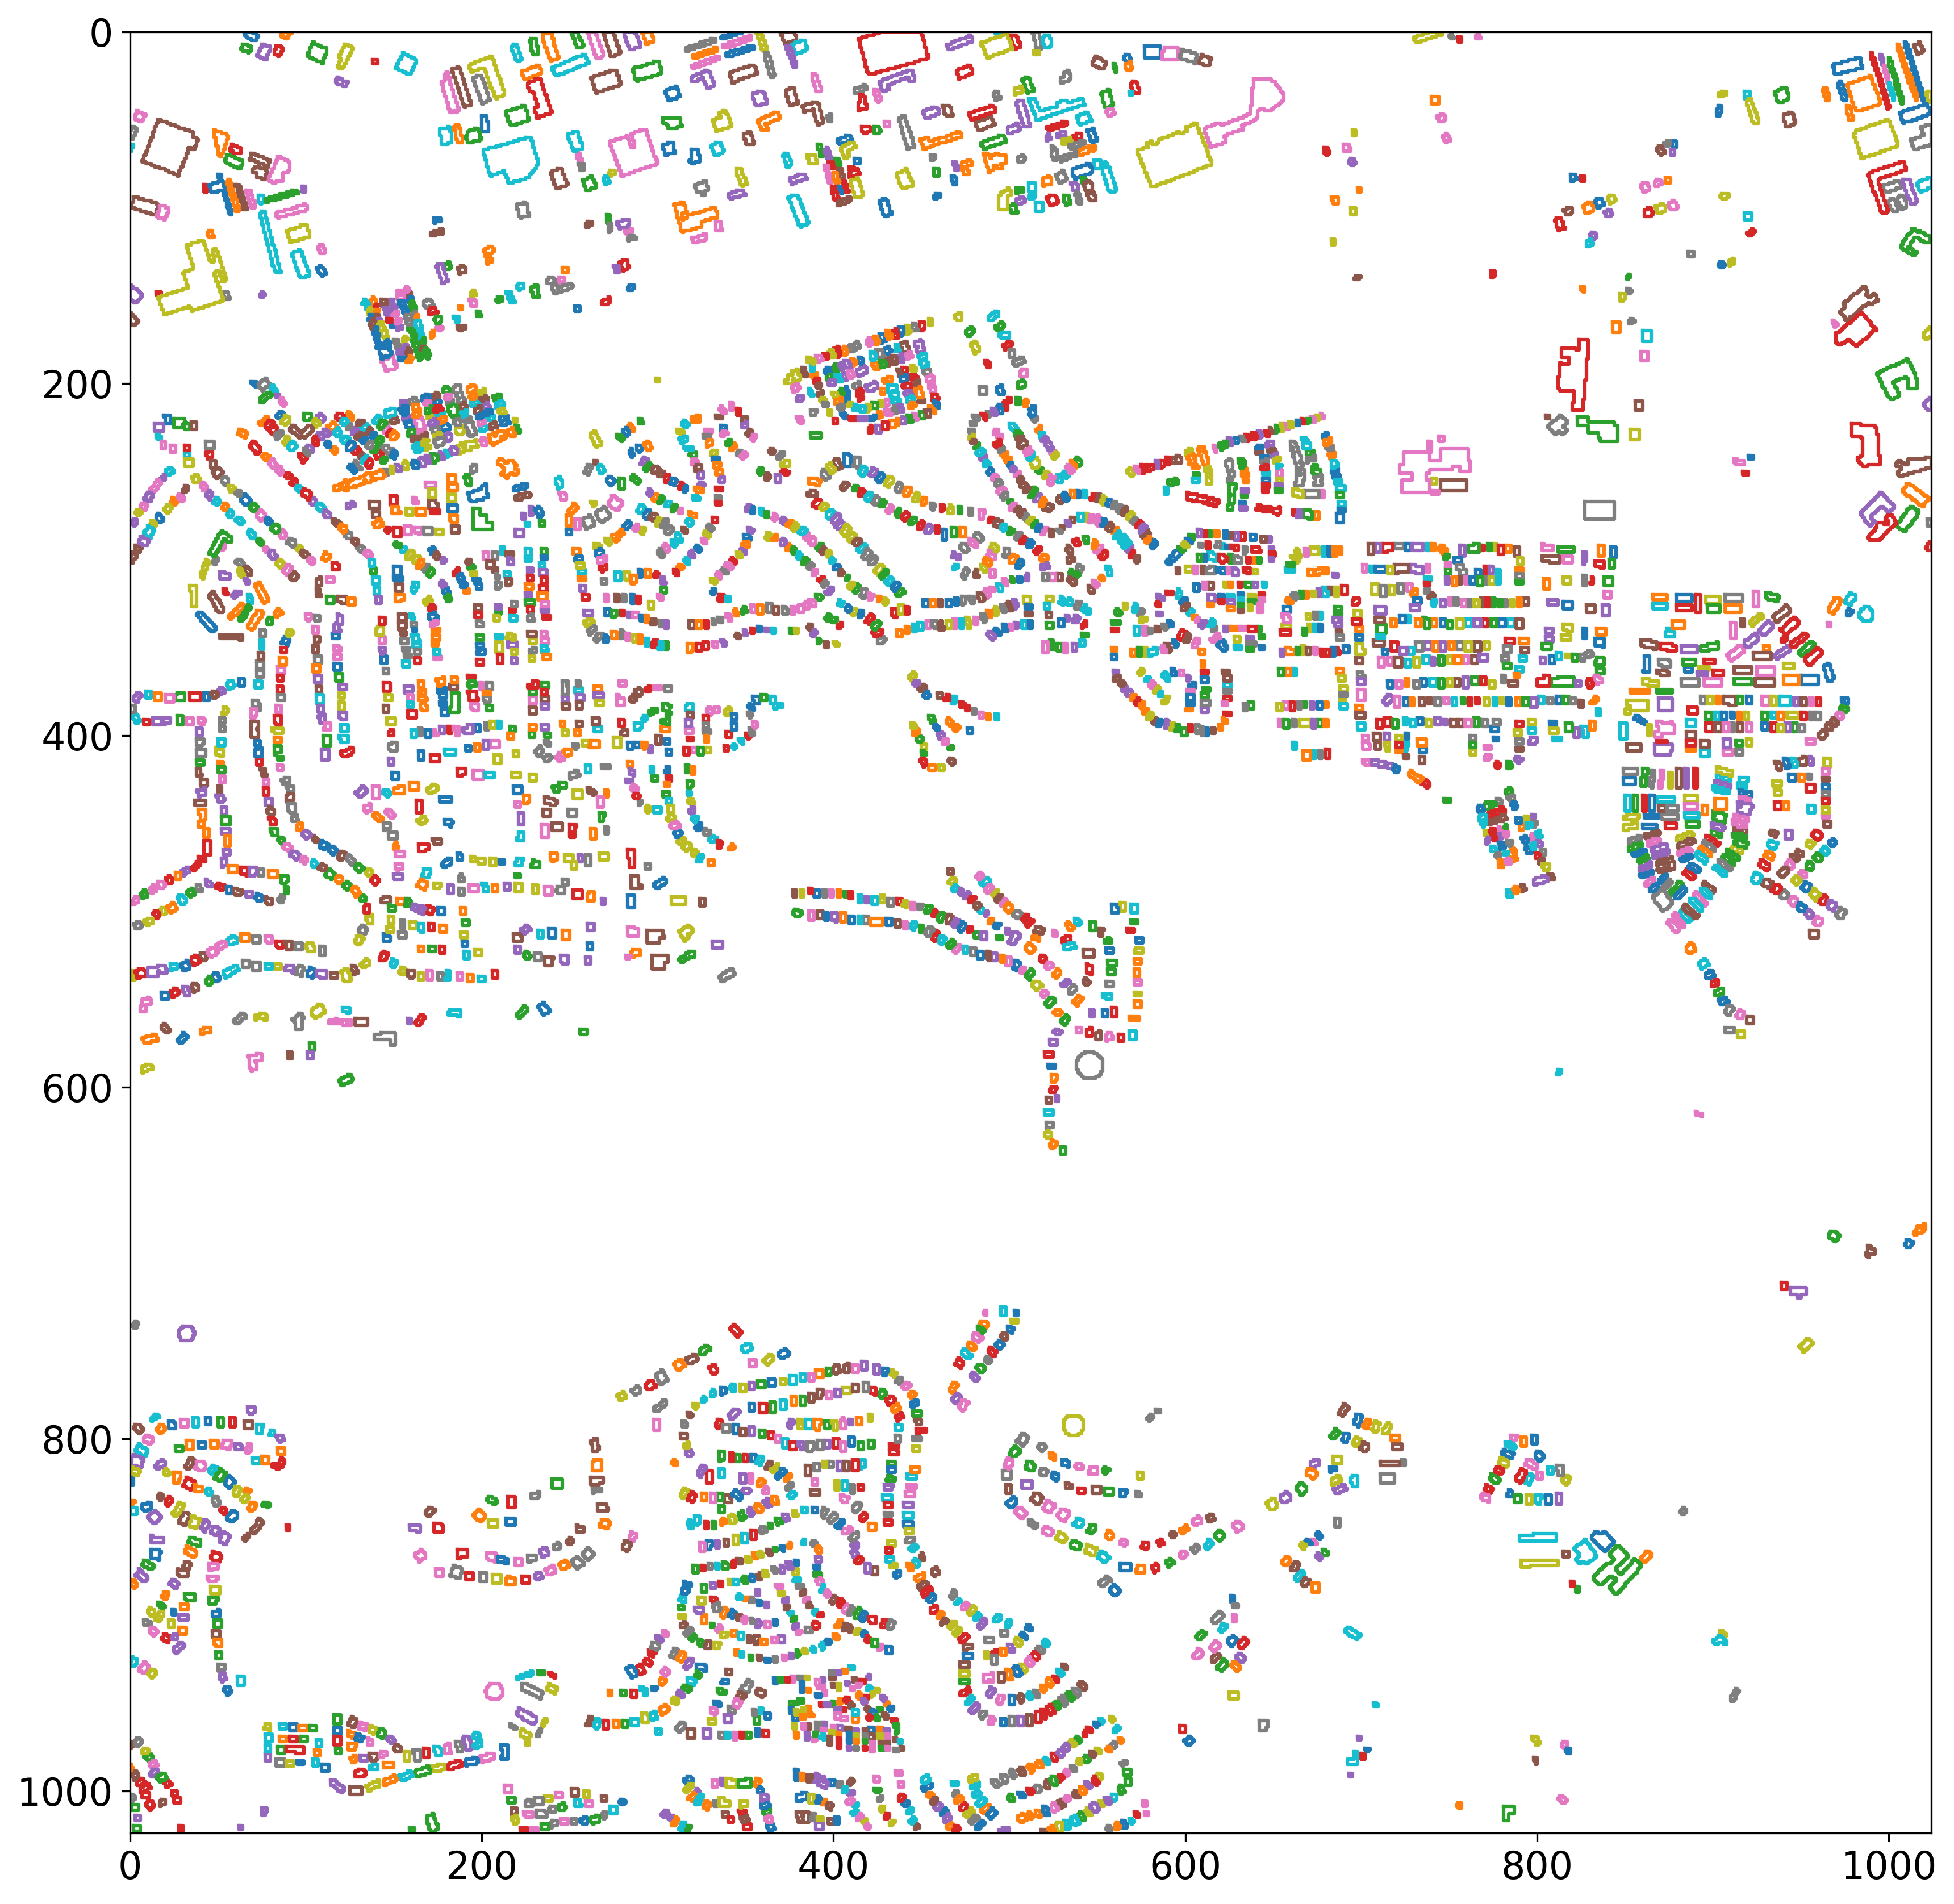

In [ ]:
# Plot each polygon shape
fig, ax = plt.subplots(figsize=(14, 14))
for geom in plot_geoms.geoms:
    ax.plot(*geom.exterior.xy)
ax.set_xlim(0, mask_image.shape[1])
ax.set_ylim(mask_image.shape[1], 0)
ax.set_aspect('equal')
# Set (current) axis to be equal before showing plot?
# plt.gca().axis("equal")
plt.savefig(os.path.join(out_dir_explore, aoi + '_footprints0.png'))
plt.show()

In [ ]:
# Original image

#data_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET"
data_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif"
#src_im_path = os.path.join(data_path, 'MVOI_data/MVOI_nadir10_test_sample.tif')
src_im_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif"

im_arr = skimage.io.imread(data_path)
#pred = skimage.io.imread(os.path.join(sample_mask_path))


pred_arr = sol.vector.mask.footprint_mask(geoms,
                                          reference_im=src_im_path)
ground_truth = skimage.io.imread("/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/masks/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif")
#ground_truth = sol.vector.mask.footprint_mask(
    # geojson fomat
 #   os.path.join("/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/labels/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.geojson"),
    # img
  #  reference_im=src_im_path)
f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[:, :, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr, cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(ground_truth, cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');


f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[100:600,100:600, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr[100:600,100:600], cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(ground_truth[100:600,100:600], cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');

f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[100:200,100:200, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr[100:200,100:200], cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(ground_truth[100:200,100:200], cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');

inval = 140
outval = 230



f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[inval:outval,inval:outval, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr[inval:outval,inval:outval], cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(ground_truth[inval:outval,inval:outval], cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');



Output hidden; open in https://colab.research.google.com to view.

### 3.C. Extract building footprint geometries for all AOIs

In [ ]:
# Get all geoms for all aois (mult-threaded)

min_area = 3.5   # in pixels (4 is standard)
simplify = False
bg_threshold = 0  
output_type = 'geojson'
aois = sorted([f for f in os.listdir(os.path.join(pred_top_dir, 'grouped')) if os.path.isdir(os.path.join(pred_top_dir, 'grouped', f))])

# set params
params = []
for i, aoi in enumerate(aois):
    print(i, "/", len(aois), aoi)   
    outdir = os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons')
    os.makedirs(outdir, exist_ok=True)
    pred_files = sorted([os.path.join(pred_top_dir, 'grouped', aoi, 'masks', f)
                for f in sorted(os.listdir(os.path.join(pred_top_dir, 'grouped', aoi, 'masks')))
                if f.endswith('.tif')])
    for j, p in enumerate(pred_files):
        name = os.path.basename(p)
        # print(i, j, name)
        output_path_pred = os.path.join(outdir,  name.split('.tif')[0] + '.geojson')
        # get pred geoms
        if not os.path.exists(output_path_pred):
            pred_image = skimage.io.imread(p)#[:,:,0]
            params.append([pred_image, min_area, output_path_pred,
                          output_type, bg_threshold, simplify])        

print("Execute!")
print("len params:", len(params))
n_threads = 10
pool = multiprocessing.Pool(n_threads)
_ = pool.map(multithread_polys, params)

0 / 21 L15-0357E-1223N_1429_3296_13
1 / 21 L15-0369E-1244N_1479_3214_13
2 / 21 L15-0391E-1219N_1567_3314_13
3 / 21 L15-0509E-1108N_2037_3758_13
4 / 21 L15-0571E-1302N_2284_2983_13
5 / 21 L15-0697E-0874N_2789_4694_13
6 / 21 L15-0744E-0927N_2979_4481_13
7 / 21 L15-1031E-1300N_4127_2991_13
8 / 21 L15-1129E-0819N_4517_4915_13
9 / 21 L15-1203E-1203N_4815_3379_13
10 / 21 L15-1213E-1238N_4852_3239_13
11 / 21 L15-1249E-1167N_4999_3521_13
12 / 21 L15-1281E-1035N_5125_4049_13
13 / 21 L15-1438E-1227N_5753_3282_13
14 / 21 L15-1546E-1154N_6186_3574_13
15 / 21 L15-1615E-1205N_6461_3368_13
16 / 21 L15-1630E-0988N_6522_4239_13
17 / 21 L15-1666E-1189N_6665_3433_13
18 / 21 L15-1670E-1159N_6681_3552_13
19 / 21 L15-1690E-1210N_6762_3348_13
20 / 21 L15-1749E-1266N_6997_3126_13
Execute!
len params: 0


### 3.D. Track building identifiers
Now we assign a unique identifier to each building, and propogate that identifier through the data cube.

In [ ]:
min_iou = 0.2
iou_field = 'iou_score'
id_field = 'Id'
reverse_order = False
verbose = True
super_verbose = False
n_threads = 10

json_dir_name = 'pred_jsons/'
out_dir_name = 'pred_jsons_match/'
aois = sorted([f for f in os.listdir(os.path.join(pred_top_dir, 'grouped')) 
               if os.path.isdir(os.path.join(pred_top_dir, 'grouped', f))])
print("aois:", aois)

print("Gather data for matching...")
params = []
for aoi in aois:
    print(aoi)
    json_dir = os.path.join(pred_top_dir, 'grouped', aoi, json_dir_name)
    out_dir = os.path.join(pred_top_dir, 'grouped', aoi, out_dir_name)
    
    # check if we started matching...
    if os.path.exists(out_dir):
        # print("  outdir exists:", outdir)
        json_files = sorted([f
                for f in os.listdir(os.path.join(json_dir))
                if f.endswith('.geojson') and os.path.exists(os.path.join(json_dir, f))])
        out_files_tmp = sorted([z for z in os.listdir(out_dir) if z.endswith('.geojson')])
        if len(out_files_tmp) > 0:
            if len(out_files_tmp) == len(json_files):
                print("Dir:", os.path.basename(out_dir), "N files:", len(json_files), 
                      "directory matching completed, skipping...")
                continue
            elif len(out_files_tmp) != len(json_files):
                # raise Exception("Incomplete matching in:", out_dir, "with N =", len(out_files_tmp), 
                #                 "files (should have N_gt =", 
                #                 len(json_files), "), need to purge this folder and restart matching!")
                print("Incomplete matching in:", out_dir, "with N =", len(out_files_tmp), 
                                "files (should have N_gt =", 
                                len(json_files), "), purging this folder and restarting matching!")
                purge_cmd = 'rm -r ' + out_dir
                print("  purge_cmd:", purge_cmd)
                if len(out_dir) > 20:
                    purge_cmd = 'rm -r ' + out_dir
                else:
                    raise Exception("out_dir too short, maybe deleting something unintentionally...")
                    break
                os.system(purge_cmd)
            else:
                pass

    params.append([track_footprint_identifiers, json_dir,  out_dir, min_iou, 
                   iou_field, id_field, reverse_order, verbose, super_verbose])    

print("Len params:", len(params))

aois: ['L15-0357E-1223N_1429_3296_13', 'L15-0369E-1244N_1479_3214_13', 'L15-0391E-1219N_1567_3314_13', 'L15-0509E-1108N_2037_3758_13', 'L15-0571E-1302N_2284_2983_13', 'L15-0697E-0874N_2789_4694_13', 'L15-0744E-0927N_2979_4481_13', 'L15-1031E-1300N_4127_2991_13', 'L15-1129E-0819N_4517_4915_13', 'L15-1203E-1203N_4815_3379_13', 'L15-1213E-1238N_4852_3239_13', 'L15-1249E-1167N_4999_3521_13', 'L15-1281E-1035N_5125_4049_13', 'L15-1438E-1227N_5753_3282_13', 'L15-1546E-1154N_6186_3574_13', 'L15-1615E-1205N_6461_3368_13', 'L15-1630E-0988N_6522_4239_13', 'L15-1666E-1189N_6665_3433_13', 'L15-1670E-1159N_6681_3552_13', 'L15-1690E-1210N_6762_3348_13', 'L15-1749E-1266N_6997_3126_13']
Gather data for matching...
L15-0357E-1223N_1429_3296_13
Incomplete matching in: /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0357E-1223N_1429_3296_13/pred_jsons_match/ with N = 6 files (should have N_gt = 25 ), purging this folder and restarting match

In [ ]:
print("Execute!")
n_threads = 10
pool = multiprocessing.Pool(n_threads)
_ = pool.map(map_wrapper, params)

Execute!

Matching json_dir: 
Matching json_dir:   N json: 0

Matching json_dir: 
Matching json_dir: 
Matching json_dir:   N json: 0
  N json: 0
  N json: 0
  N json: 0

Matching json_dir: 
Matching json_dir: 
Matching json_dir: 
Matching json_dir:   N json: 0
  N json: 0
  N json: 0

Matching json_dir:   N json: 0

Matching json_dir:   N json: 0

Matching json_dir:   N json: 0

Matching json_dir:   N json: 0

Matching json_dir: 
Matching json_dir:   N json: 0

Matching json_dir:   N json: 0

Matching json_dir: 
Matching json_dir: 
Matching json_dir:   N json: 0
  N json: 0
  N json: 0
  N json: 0
  N json: 0


Exception: ignored

In [ ]:

# %matplotlib notebook
im_pix_size_x, im_pix_size_y = 1024, 1024
max_plots = 2
label_font_size = 5
figsize = (16, 16)

#aois = ['L15-1281E-1035N_5125_4049_13']
#aois = ['L15-0509E-1108N_2037_3758_13']
aois = ['L15-0357E-1223N_1429_3296_13']
print("aois:", aois)

count = 0
for i, aoi in enumerate(aois):
    print("\n")
    print(i, "aoi:", aoi)
    
    json_files = sorted([f
                for f in os.listdir(os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons_match'))
                if f.endswith('.geojson') and os.path.exists(os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons_match', f))])
    # take only the first and last?
    # json_files = [json_files[0], json_files[-1]]
    # plot 
    for j, f in enumerate(json_files):
        if count >= max_plots:
            break
        else:
            count += 1
        print(i, j, f)
        name_root = f.split('.')[0]
        json_path = os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons_match', f)
        print("name_root:", name_root)
        # print("json_path:", json_path)
        gdf_pix = _check_gdf_load(json_path)
        fig, ax = plt.subplots(figsize=figsize)
        for _, row in gdf_pix.iterrows():
            geom = row['geometry']
            poly_id = row['Id']
            x, y = geom.exterior.xy
            cx, cy = np.array(geom.centroid.xy).astype(float)
            # print("centroid:", centroid)
            ax.plot(x, y)
            # poly id
            ax.annotate(str(poly_id), xy=(cx, cy), ha='center', size=label_font_size)
            # text_object = plt.annotate(label, xy=(x_values[i], y_values[i]), ha='center')
            # ax.text(cx, cy, str(poly_id))
        ax.set_xlim(0, im_pix_size_x)
        ax.set_ylim(0, im_pix_size_y)
        title = str(j) + " - " + name_root + " - N buildings = " + str(len(gdf_pix))
        ax.set_title(title)
        plt.tight_layout()
        
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Make proposal csv

out_dir_csv = os.path.join(pred_top_dir, 'csvs')
print("out_dir_csv: ", out_dir_csv)
os.makedirs(out_dir_csv, exist_ok=True)
prop_file = os.path.join(out_dir_csv, 'sn7_baseline_predictions.csv')
print("prop_file: ",prop_file)
aoi_dirs = sorted([os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons_match') \
                   for aoi in os.listdir(os.path.join(pred_top_dir, 'grouped')) \
                   if os.path.isdir(os.path.join(pred_top_dir, 'grouped', aoi, 'pred_jsons_match'))])
print("aoi_dirs:", aoi_dirs)

# Execute
if not os.path.exists(prop_file):
    net_df = sn7_convert_geojsons_to_csv(aoi_dirs, prop_file, 'proposal')

print("prop_file:", prop_file)

out_dir_csv:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/csvs
prop_file:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/csvs/sn7_baseline_predictions.csv
aoi_dirs: ['/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0357E-1223N_1429_3296_13/pred_jsons_match', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0369E-1244N_1479_3214_13/pred_jsons_match', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0391E-1219N_1567_3314_13/pred_jsons_match', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0509E-1108N_2037_3758_13/pred_jsons_match', '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/

In [ ]:
import pandas as pd
df_true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/truth-sample.csv")
df_pred = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/csvs/sn7_baseline_predictions.csv")

In [ ]:
# Train_Csv = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/csvs/sn7_baseline_train_df.csv"
df_true_f = df_true[0:7488 ]
df_true_f
df_true_f.to_csv("/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/truth-sample_F.csv")

https://github.com/CosmiQ/solaris/blob/master/solaris/eval/challenges.py 

In [ ]:
sol.eval.challenges.multi_temporal_buildings("/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/csvs/sn7_baseline_predictions.csv", "/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/truth-sample_F.csv")

0.0

In [ ]:
# Set prediction and image directories (edit appropriately)
pred_top_dir = '/content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds'
im_top_dir = '/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_test_public/test_public'
#im_top_dir = '/local_data/sn7/aws_download/test_public'

aoi = 'L15-0509E-1108N_2037_3758_13'
#aoi = 'L15-0357E-1223N_1429_3296_13'
# create temporal explore folder on sn7_baseline_preds path
out_dir_explore = os.path.join(pred_top_dir, 'explore', aoi)
print("pred_top_dir: ",pred_top_dir)
os.makedirs(out_dir_explore, exist_ok=True)
# Create mask subfolder  inside the grouped + aoi folder
pred_dir = os.path.join(pred_top_dir, 'grouped', aoi, 'masks')
print("pred_dir: ", pred_dir)
# access the testing set images_masked: 
im_dir = os.path.join(im_top_dir, aoi, 'images_masked')
print("im_dir: ", im_dir)
# im_list will work because of manual pasting from img on training to grouped (which contains masks)
im_list = sorted([z for z in os.listdir(pred_dir) if z.endswith('.tif')])
# Make sure that files inside this folder have the same name as reference image
print("im_list: ",im_list)

pred_top_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds
pred_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0509E-1108N_2037_3758_13/masks
im_dir:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_test_public/test_public/L15-0509E-1108N_2037_3758_13/images_masked
im_list:  ['global_monthly_2018_04_mosaic_L15-0509E-1108N_2037_3758_13.tif']


In [ ]:
sample_mask_name = im_list[0] # opied from masks to images masked
# We only need 1 for sampling, but extract index 0
print("sample_mask_name: ", sample_mask_name)
sample_mask_path = os.path.join(pred_dir, sample_mask_name)
print("sample_mask_path: ",sample_mask_path)
sample_im_path = os.path.join(im_dir, sample_mask_name)
print("sample_im_path: ",sample_im_path)
# extract mask
image = skimage.io.imread(sample_im_path)
mask_image = skimage.io.imread(sample_mask_path)
print("mask_image.shape:", mask_image.shape)
print("min, max, mean mask image:", np.min(mask_image), np.max(mask_image), np.mean(mask_image))

sample_mask_name:  global_monthly_2018_04_mosaic_L15-0509E-1108N_2037_3758_13.tif
sample_mask_path:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/CosmiQ_SN7_Baseline/inference_out/sn7_baseline_preds/grouped/L15-0509E-1108N_2037_3758_13/masks/global_monthly_2018_04_mosaic_L15-0509E-1108N_2037_3758_13.tif
sample_im_path:  /content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_test_public/test_public/L15-0509E-1108N_2037_3758_13/images_masked/global_monthly_2018_04_mosaic_L15-0509E-1108N_2037_3758_13.tif
mask_image.shape: (1024, 1024)
min, max, mean mask image: -31.920715 11.426057 -6.050483


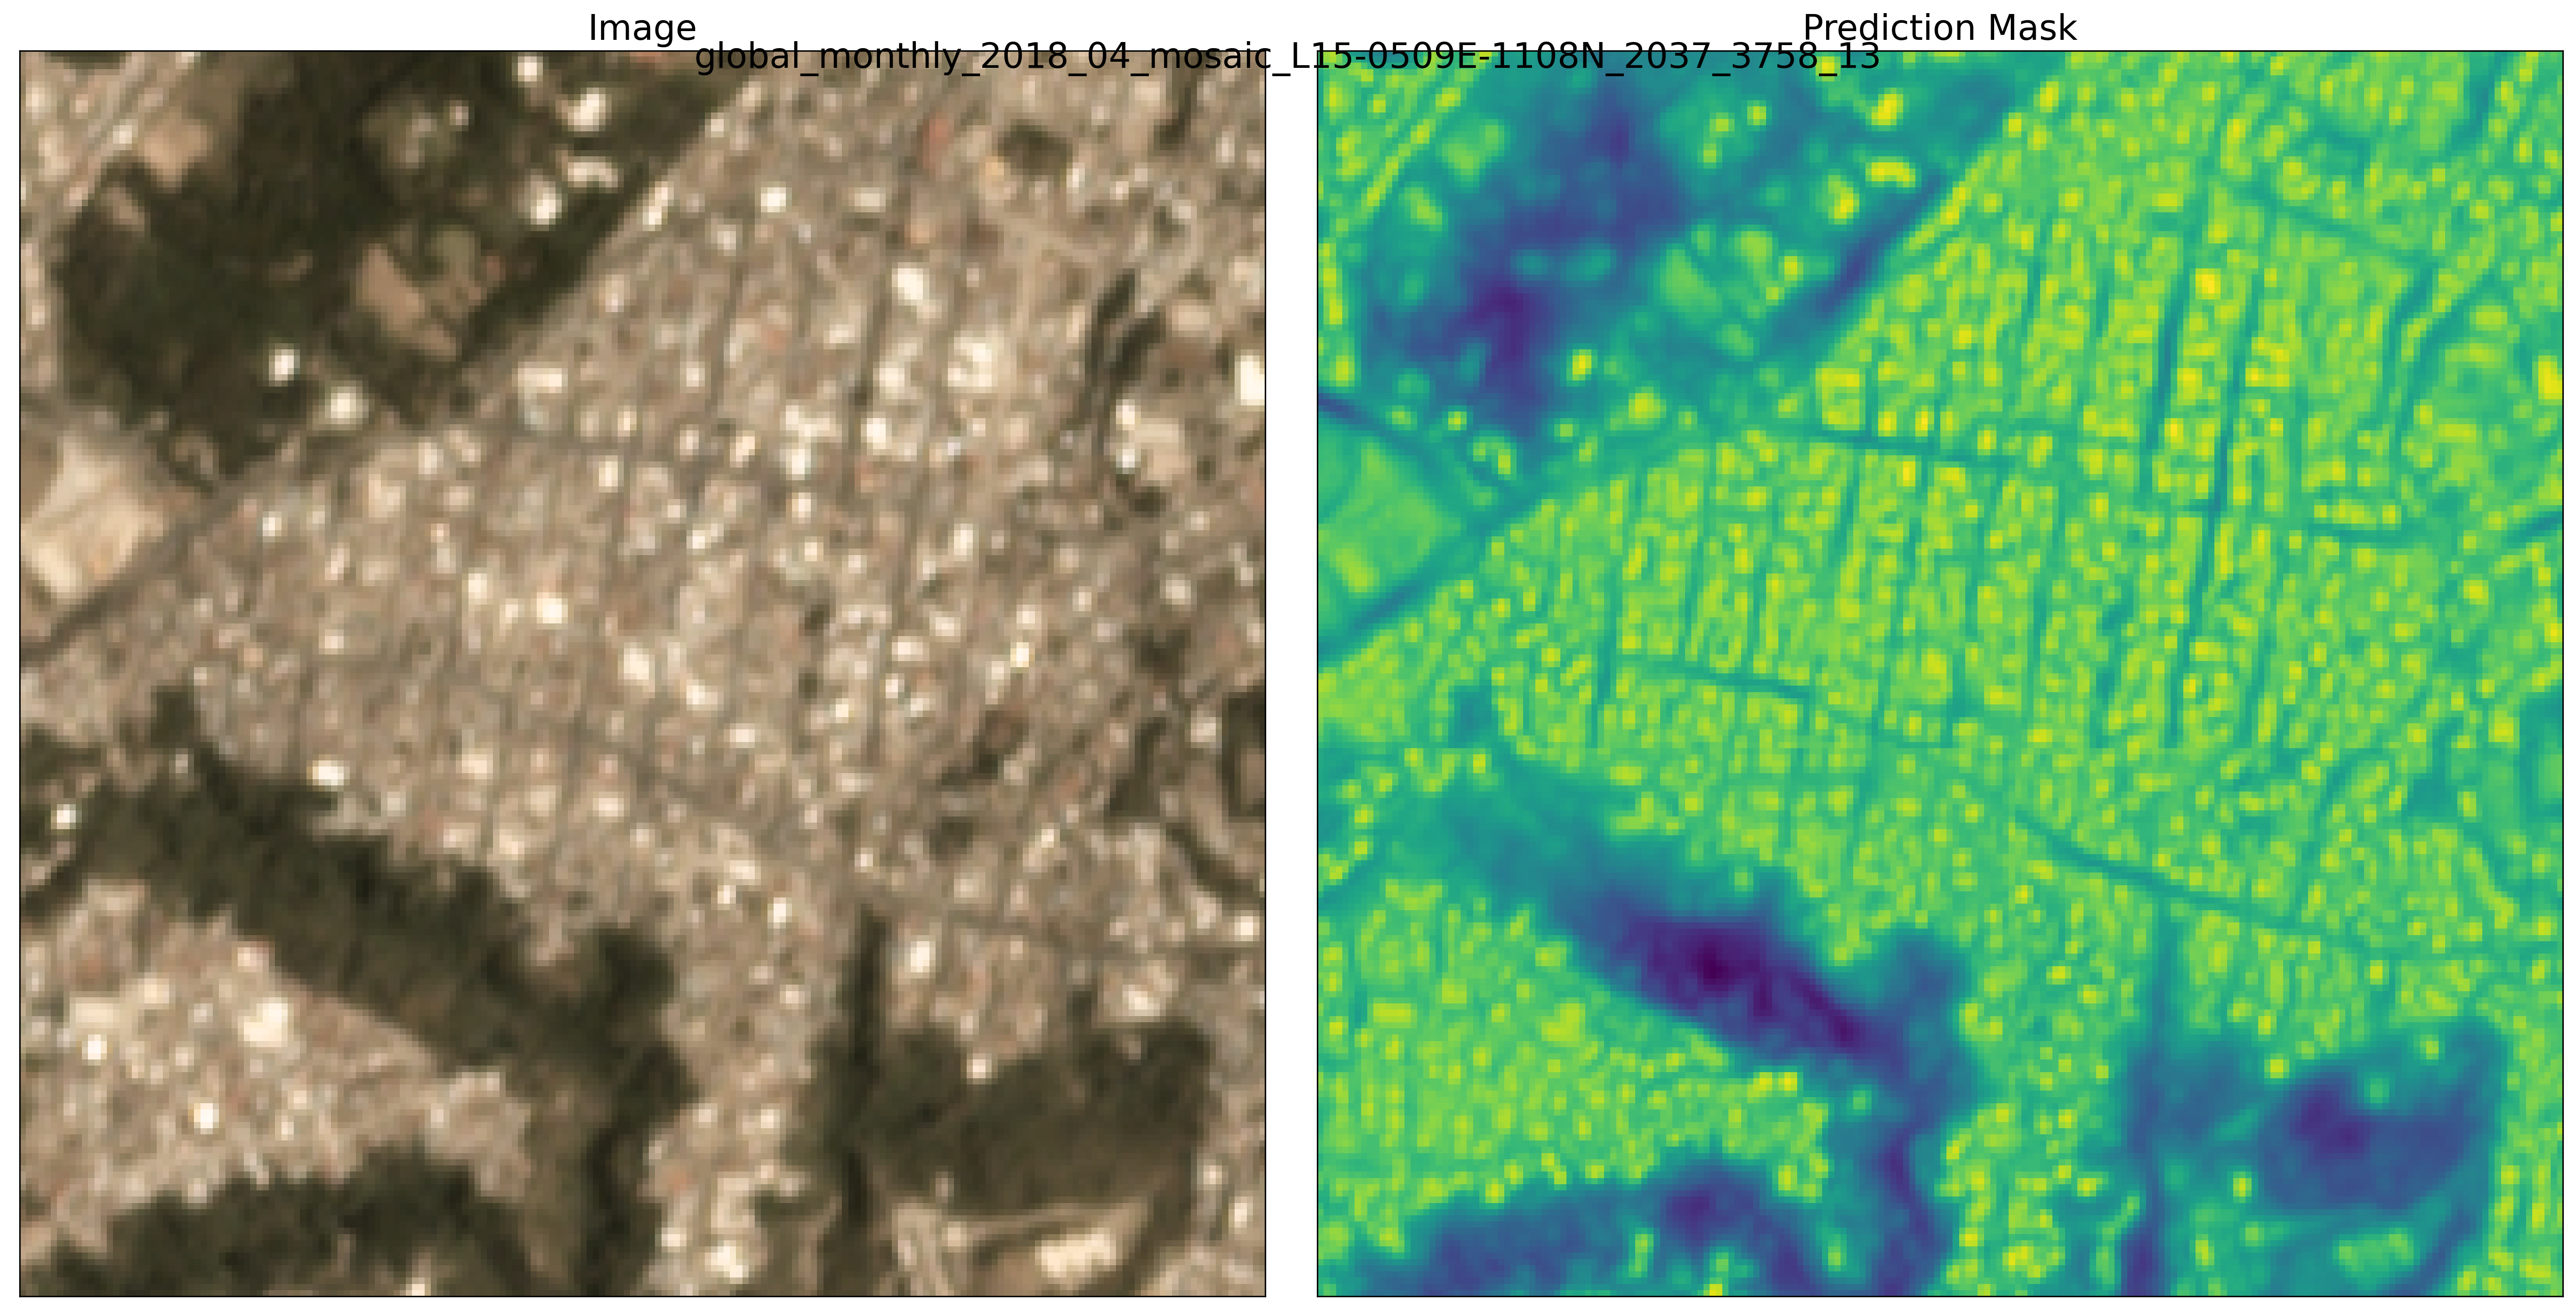

In [ ]:
# zoom in a subset 
# horizontal 
figsize = (20, 10)
bounds = []
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)
_ = ax0.imshow(image[400:600,400:600,:])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Image')
_ = ax1.imshow(mask_image[400:600,400:600])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Prediction Mask')
plt.suptitle(sample_mask_name.split('.')[0])
plt.tight_layout()
plt.savefig(os.path.join(out_dir_explore, aoi + '_im0+mask0_zoom.png'))
plt.show()

In [ ]:
# Extract and inspect sample footprints
# https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_mask_to_vector.html
# https://github.com/CosmiQ/solaris/blob/master/solaris/vector/mask.py#L718

output_path_pred = os.path.join(out_dir_explore, aoi + '_pred0.geojson')
min_area = 3.5    # in pixels
bg_threshold = 0
simplify = False
print("output_path_pred: ",output_path_pred)
print("bg_threshold:", bg_threshold)
print("min_area:", min_area)
geoms = sol.vector.mask.mask_to_poly_geojson(mask_image, 
                                             min_area=min_area, 
                                             output_path=output_path_pred,
                                             output_type='geojson',
                                             bg_threshold=bg_threshold,
                                             simplify=simplify)
display(geoms.head())
print("N geoms:", len(geoms))

# get plot geoms
plot_geoms = cascaded_union(geoms['geometry'])
display(plot_geoms)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Original image

#data_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET"
data_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif"
#src_im_path = os.path.join(data_path, 'MVOI_data/MVOI_nadir10_test_sample.tif')
src_im_path = "/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/images_masked/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif"

im_arr = skimage.io.imread("/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_test_public/test_public/L15-0509E-1108N_2037_3758_13/images_masked/global_monthly_2018_02_mosaic_L15-0509E-1108N_2037_3758_13.tif")
#pred = skimage.io.imread(os.path.join(sample_mask_path))


pred_arr = sol.vector.mask.footprint_mask(geoms,
                                          reference_im=src_im_path)
#ground_truth = skimage.io.imread("/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/masks/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.tif")
#ground_truth = sol.vector.mask.footprint_mask(
    # geojson fomat
 #   os.path.join("/content/drive/MyDrive/Colab Notebooks/SPACENET7/DATASET/SN7_buildings_train/train/L15-0357E-1223N_1429_3296_13/labels/global_monthly_2018_01_mosaic_L15-0357E-1223N_1429_3296_13.geojson"),
    # img
  #  reference_im=src_im_path)
f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[:, :, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr, cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(pred_arr, cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');


f, axarr = plt.subplots(1, 3, figsize=(16, 12))
axarr[0].imshow(im_arr[100:600,100:600, 0:3])
axarr[0].set_title('Source image', size=14)
axarr[0].axis('off')
axarr[1].imshow(pred_arr[100:600,100:600], cmap='gray')
axarr[1].set_title('Predictions', size=14)
axarr[1].axis('off')
axarr[2].imshow(pred_arr[100:400,100:400], cmap='gray') # _ = ax1.imshow(mask_image[400:600,400:600])
axarr[2].set_title('Ground Truth', size=14);
axarr[2].axis('off');

Output hidden; open in https://colab.research.google.com to view.